# Benefits of  applying PCA on images:
* Huge number of features in images i.e. every pixel in image acts as a feature.
* A lot of covariance among features i.e. pixels in vicinity describes similar object.
* Applying PCA reduces the total memory requirement
* PCA improves the training speed

# PCA on Olivetti

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [3]:
oliv

{'DESCR': 'Modified Olivetti faces dataset.\n\nThe original database was available from\n\n    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nThe version retrieved here comes in MATLAB format from the personal\nweb page of Sam Roweis:\n\n    http://www.cs.nyu.edu/~roweis/\n\nThere are ten different images of each of 40 distinct subjects. For some\nsubjects, the images were taken at different times, varying the lighting,\nfacial expressions (open / closed eyes, smiling / not smiling) and facial\ndetails (glasses / no glasses). All the images were taken against a dark\nhomogeneous background with the subjects in an upright, frontal position (with\ntolerance for some side movement).\n\nThe original dataset consisted of 92 x 112, while the Roweis version\nconsists of 64x64 images.\n',
 'data': array([[ 0.30991736,  0.36776859,  0.41735536, ...,  0.15289256,
          0.16115703,  0.1570248 ],
        [ 0.45454547,  0.47107437,  0.51239669, ...,  0.15289256,
          

In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oliv.data.shape

(400, 4096)

In [6]:
oliv.images.shape

(400, 64, 64)

We have 400 images each of 64 * 64 pixels and 
in data we have these 400 rows for each image and respective pixel information in 4096 columns (by flatening 2d array into 1d)

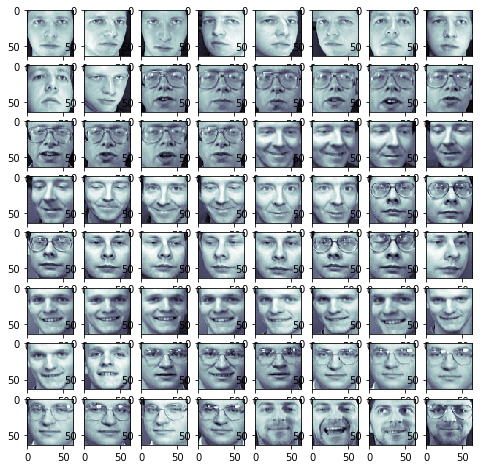

In [7]:
# plotting first 64 images
fig = plt.figure(figsize=(8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)
plt.show()

In [8]:
x = oliv.data
y = oliv.target

In [9]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.components_.shape
## 400 components(features) because documnetation says by default if no n_component is passed then
# minimum of rows/col is taken as component. 
# Also each component has 4096 length of eigen unit vector

(400, 4096)

In [11]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.95):
    current_sum += pca.explained_variance_[k]
    k += 1
k

123

In [12]:
# Whiten is true applies kind of feature scaling on image data 
pca = PCA(n_components=k, whiten=True)

transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

# Reproducing Images

In [13]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [14]:
x_approx_images = x_approx.reshape((400, 64, 64))

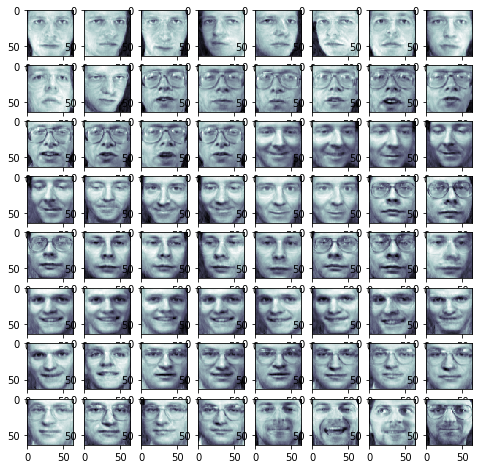

In [15]:
# plotting first 64 images
fig = plt.figure(figsize=(8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)
plt.show()

# Eigen Faces

In [16]:
eigen_vectors = pca.components_
eigen_vectors.shape

(123, 4096)

In [17]:
eigen_faces = eigen_vectors.reshape((123,64,64))

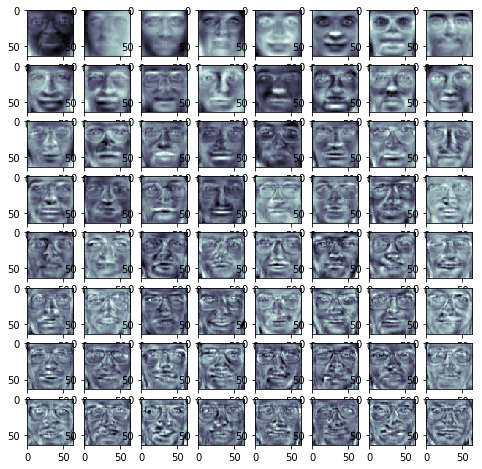

In [18]:
# plotting first 64 images
fig = plt.figure(figsize=(8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigen_faces[i], cmap = plt.cm.bone)
plt.show()

Each of the eigen faces are focussing on differnet aspects of the face.